# Etapa 2 del proyecto. La tarea de clasificación: árboles de decisión y K-vecinos más cercanos

## Analisis del problema

El acceso al agua potable segura es un pilar fundamental para la salud humana, un derecho básico y un componente esencial de políticas efectivas de protección sanitaria. Su importancia trasciende lo individual, constituyendo un factor crítico en el desarrollo a nivel nacional, regional y local. La falta de agua potable de calidad no solo impacta la salud pública, sino que también genera costos económicos significativos asociados a enfermedades y tratamientos médicos. En contraparte, se ha demostrado que inversiones estratégicas en infraestructuras de suministro y saneamiento de agua pueden generar beneficios económicos netos, al reducir los efectos adversos en la salud y los gastos sanitarios.

En este contexto, la capacidad de predecir la potabilidad del agua a partir de sus características fisicoquímicas se convierte en una herramienta valiosa para la toma de decisiones informadas y la optimización de recursos. Este proyecto se centra en el desarrollo y evaluación de modelos de Machine Learning, específicamente árboles de decisión y K-vecinos más cercanos, para predecir la potabilidad del agua. El objetivo principal es construir modelos precisos y robustos que puedan identificar los factores clave que influyen en la calidad del agua, y proporcionar una herramienta predictiva que contribuya a la gestión eficiente de los recursos hídricos y a la protección de la salud pública.

La evaluación del rendimiento de nuestros modelos se realizará utilizando métricas clave como la precisión (precision) y el recall (sensibilidad). La precisión nos permitirá medir la proporción de predicciones positivas correctas entre todas las predicciones positivas realizadas por el modelo, es decir, qué tan confiables son nuestras predicciones de agua potable. Por otro lado, el recall nos indicará la proporción de casos positivos reales que el modelo es capaz de identificar correctamente, asegurando que minimizamos el riesgo de clasificar agua no potable como potable. Estas métricas son fundamentales en este contexto, ya que un falso negativo (clasificar agua no potable como potable) puede tener consecuencias graves para la salud pública. Por lo tanto, buscaremos un equilibrio entre precisión y recall para garantizar la máxima confiabilidad de nuestras predicciones.

## Recoleccion de datos

###  Importación de librerías requeridas

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, validation_curve
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

from importlib.metadata import version

print(f"Versión de Pandas: {version('pandas')}")
print(f"Versión de Matplotlib: {version('matplotlib')}")
print(f"Versión de Scikit-learn: {version('scikit-learn')}")
print(f"Versión de Numpy: {version('numpy')}")

Versión de Pandas: 2.2.2
Versión de Matplotlib: 3.9.2
Versión de Scikit-learn: 1.6.1
Versión de Numpy: 1.26.4


### Carga de datos

In [8]:
ruta_archivo = './Etapa 2 del proyecto/Datos_Etapa-2.csv'
data_raw = pd.read_csv(ruta_archivo, sep=';', na_values=['?'], encoding = 'utf-8')

In [9]:
data_raw.head()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
0,NaN,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,NO
1,3.72,129.42,18630.06,6.64,NaN,592.89,15.18,56.33,4.50,NO
2,8.10,224.24,19909.54,9.28,NaN,418.61,16.87,66.42,3.06,NO
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,NO
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,NO


Podemos observar que, únicamente la variable objetivo es categoríca, mientras que el resto son variables numéricas. Asimismo, con tan pocos datos se logra identificar la presentcia de datos faltantes.

## Exploracion de los datos

In [12]:
data_raw.describe()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080804,196.369481,22014.092415,7.122241,333.775784,426.205171,14.284921,66.396281,3.966731
std,1.594369,32.879680,8768.570852,1.583143,41.416864,80.824123,3.308232,16.174983,0.780354
min,0.000000,47.430000,320.940000,0.350000,129.000000,181.480000,2.200000,0.740000,1.450000
25%,6.090000,176.847500,15666.687500,6.130000,307.695000,365.735000,12.070000,55.847500,3.440000
50%,7.040000,196.965000,20927.830000,7.130000,333.070000,421.885000,14.220000,66.620000,3.955000
75%,8.060000,216.670000,27332.760000,8.112500,359.950000,481.790000,16.560000,77.337500,4.500000
max,14.000000,323.120000,61227.200000,13.130000,481.030000,753.340000,28.300000,124.000000,6.740000


<Axes: xlabel='pH', ylabel='Count'>

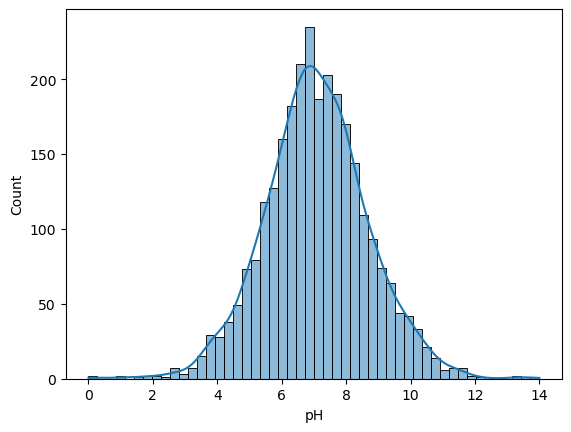

In [13]:
sns.histplot(data=data_raw, x='pH', kde=True)

<Axes: xlabel='Dureza', ylabel='Count'>

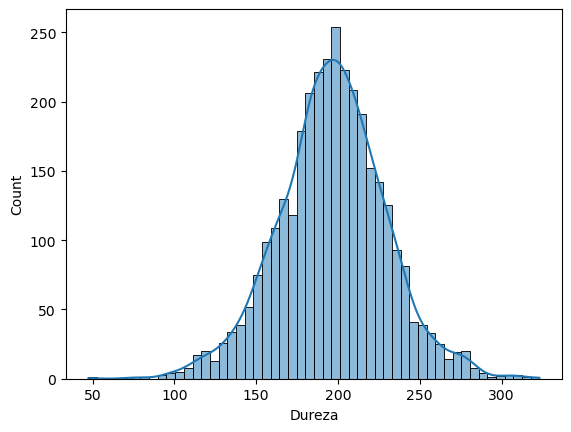

In [14]:
sns.histplot(data=data_raw, x='Dureza', kde=True)

<Axes: xlabel='Sólidos', ylabel='Count'>

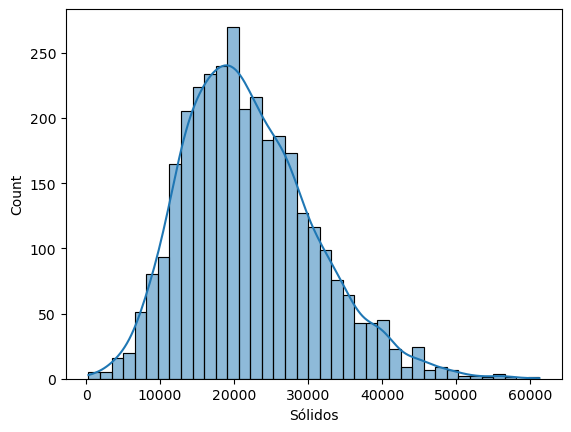

In [15]:
sns.histplot(data=data_raw, x='Sólidos', kde=True)

<Axes: xlabel='Cloraminas', ylabel='Count'>

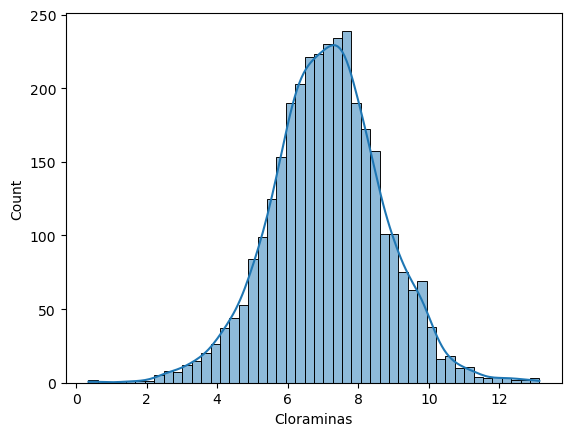

In [16]:
sns.histplot(data=data_raw, x='Cloraminas', kde=True)

<Axes: xlabel='Sulfatos', ylabel='Count'>

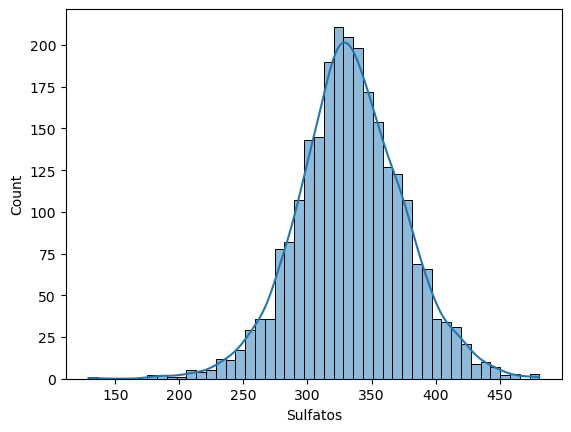

In [17]:
sns.histplot(data=data_raw, x='Sulfatos', kde=True)

<Axes: xlabel='Conductividad', ylabel='Count'>

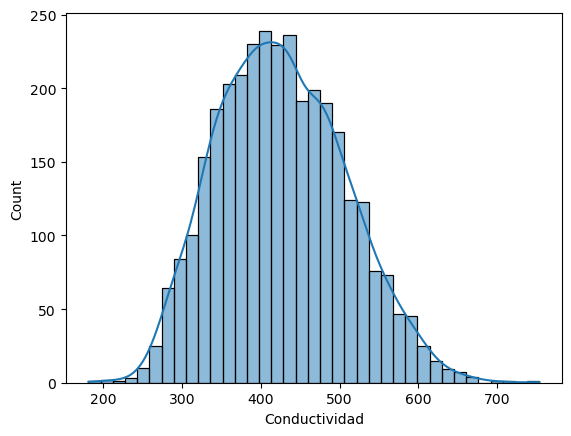

In [18]:
sns.histplot(data=data_raw, x='Conductividad', kde=True)

<Axes: xlabel='Carbono_orgánico', ylabel='Count'>

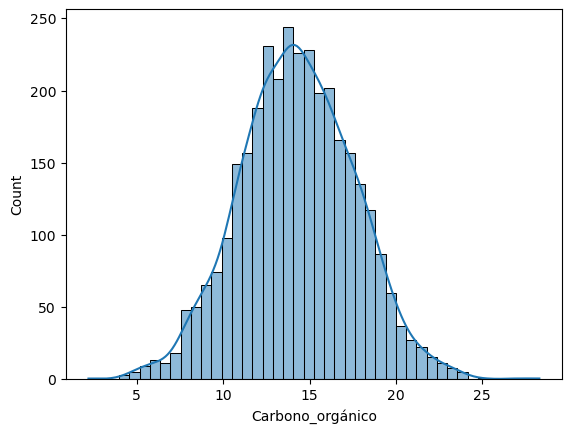

In [19]:
sns.histplot(data=data_raw, x='Carbono_orgánico', kde=True)

<Axes: xlabel='Trihalometanos', ylabel='Count'>

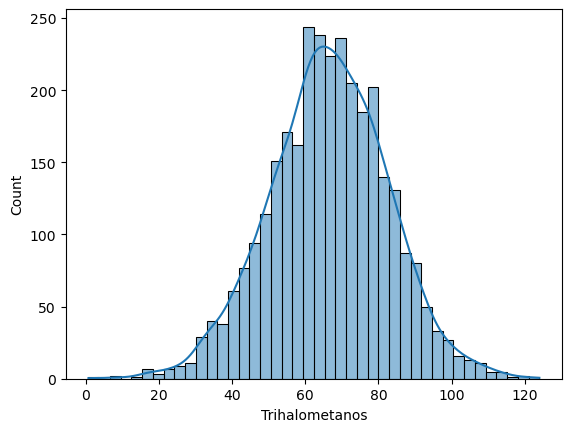

In [20]:
sns.histplot(data=data_raw, x='Trihalometanos', kde=True)

<Axes: xlabel='Turbidez', ylabel='Count'>

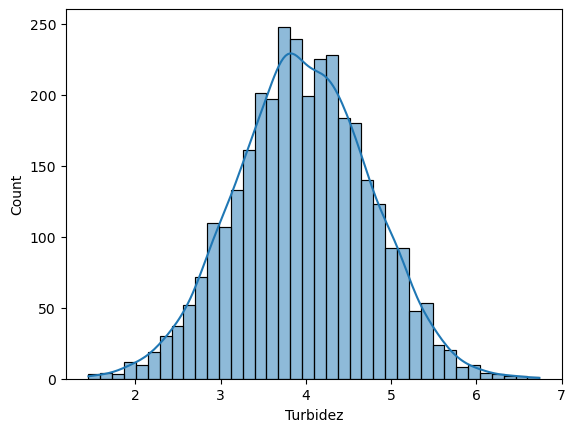

In [21]:
sns.histplot(data=data_raw, x='Turbidez', kde=True)

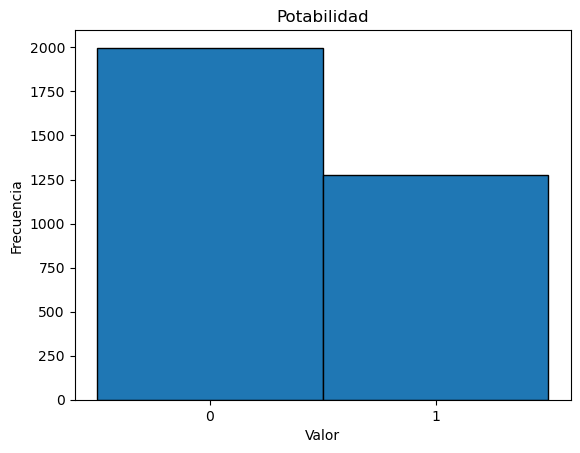

In [22]:
# Crear el histograma con bins específicos
plt.hist(data_raw['Potabilidad'], bins=[-0.5, 0.5, 1.5], edgecolor='black')

# Añadir etiquetas y título
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Potabilidad')

# Mostrar el histograma
plt.show()

In [23]:
pd.Series(data_raw['Potabilidad']).value_counts()

Potabilidad
NO    1998
SI    1278
Name: count, dtype: int64

No se identifican variables poco relevantes, considerando que todas presentan algún grado de distribución.

## Limpieza y preparacion

In [26]:
data = data_raw.copy()

En este caso, no se identifican variables poco relevantes, no se procede a reducir la dimensión a través de este criterio.

### Tratamiento de nulos y duplicados
Veremos si hay duplicados.

In [29]:
data.duplicated().sum()

0

Revisamos si hay datos nulos.

In [31]:
data.isna().sum()

pH                  491
Dureza                0
Sólidos               0
Cloraminas            0
Sulfatos            781
Conductividad         0
Carbono_orgánico      0
Trihalometanos      162
Turbidez              0
Potabilidad           0
dtype: int64

In [32]:
data.isna().sum()/data.shape[:1]

pH                  0.149878
Dureza              0.000000
Sólidos             0.000000
Cloraminas          0.000000
Sulfatos            0.238400
Conductividad       0.000000
Carbono_orgánico    0.000000
Trihalometanos      0.049451
Turbidez            0.000000
Potabilidad         0.000000
dtype: float64

En lugar de solo eliminar los "NA", podemos ver que representan una porción significativa, como 23.84% de las observaciones en la categoría de Sulfatos, 14.99% en PH y 4.95% en Trihalometanos.

In [34]:
def categorizar_ph(df):
    """Categoriza la columna 'ph' en 'acido', 'neutro' y 'alcalino' con etiquetas numéricas."""

    rangos = [0, 6.5, 8.5, 14]  # Rangos de pH
    etiquetas = [1, 2, 3]  # Etiquetas numéricas correspondientes

    df['pH'] = pd.cut(df['pH'], bins=rangos, labels=etiquetas, right=False)
    return df

# Ejemplo de uso:
# Asumiendo que 'data' es tu DataFrame
data = categorizar_ph(data)
print(data[['pH']].head())

    pH
0  NaN
1    1
2    2
3    2
4    3


In [35]:
simple_imputer = SimpleImputer(strategy='median')

In [36]:
encoder = LabelEncoder()
data['Potabilidad'] = encoder.fit_transform(data['Potabilidad'])

In [37]:
scaler = StandardScaler()

In [38]:
data.describe()

,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
count,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,196.369481,22014.092415,7.122241,333.775784,426.205171,14.284921,66.396281,3.966731,0.390110
std,32.879680,8768.570852,1.583143,41.416864,80.824123,3.308232,16.174983,0.780354,0.487849
min,47.430000,320.940000,0.350000,129.000000,181.480000,2.200000,0.740000,1.450000,0.000000
25%,176.847500,15666.687500,6.130000,307.695000,365.735000,12.070000,55.847500,3.440000,0.000000
50%,196.965000,20927.830000,7.130000,333.070000,421.885000,14.220000,66.620000,3.955000,0.000000
75%,216.670000,27332.760000,8.112500,359.950000,481.790000,16.560000,77.337500,4.500000,1.000000
max,323.120000,61227.200000,13.130000,481.030000,753.340000,28.300000,124.000000,6.740000,1.000000


In [39]:
numeric_features = ['pH','Dureza','Sólidos','Cloraminas','Sulfatos','Conductividad','Carbono_orgánico','Trihalometanos','Turbidez']

column_transformer = ColumnTransformer(
    transformers = [
        ("num", "passthrough", numeric_features)
    ],
    verbose_feature_names_out=False
)

In [40]:
steps = [
    ("imputer", simple_imputer),
    ("transformer",column_transformer)
]

In [41]:
pipeline = Pipeline(steps).set_output(transform='pandas')

In [42]:
data.head()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
0,NaN,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,0
1,1,129.42,18630.06,6.64,NaN,592.89,15.18,56.33,4.50,0
2,2,224.24,19909.54,9.28,NaN,418.61,16.87,66.42,3.06,0
3,2,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0
4,3,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0


In [43]:
data.describe()

,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
count,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,196.369481,22014.092415,7.122241,333.775784,426.205171,14.284921,66.396281,3.966731,0.390110
std,32.879680,8768.570852,1.583143,41.416864,80.824123,3.308232,16.174983,0.780354,0.487849
min,47.430000,320.940000,0.350000,129.000000,181.480000,2.200000,0.740000,1.450000,0.000000
25%,176.847500,15666.687500,6.130000,307.695000,365.735000,12.070000,55.847500,3.440000,0.000000
50%,196.965000,20927.830000,7.130000,333.070000,421.885000,14.220000,66.620000,3.955000,0.000000
75%,216.670000,27332.760000,8.112500,359.950000,481.790000,16.560000,77.337500,4.500000,1.000000
max,323.120000,61227.200000,13.130000,481.030000,753.340000,28.300000,124.000000,6.740000,1.000000


In [44]:
data.isna().sum()

pH                  492
Dureza                0
Sólidos               0
Cloraminas            0
Sulfatos            781
Conductividad         0
Carbono_orgánico      0
Trihalometanos      162
Turbidez              0
Potabilidad           0
dtype: int64

In [45]:
train, test = train_test_split(data, test_size=0.2, random_state=9)
train.head()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
75,2,211.36,25650.78,6.77,NaN,383.01,13.93,90.52,5.02,0
2013,NaN,192.74,32349.10,8.75,272.09,581.98,13.58,64.44,3.95,1
1337,2,187.95,19155.73,5.95,345.36,433.88,20.52,26.14,3.66,0
1605,2,150.78,4168.20,10.57,476.54,355.58,15.35,74.76,2.75,1
1197,1,222.92,18061.70,9.98,421.72,323.50,14.30,51.87,3.94,1


In [46]:
x_train = train.drop(['Potabilidad'],axis="columns")
y_train = train['Potabilidad']

In [47]:
x_train

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez
75,2,211.36,25650.78,6.77,NaN,383.01,13.93,90.52,5.02
2013,NaN,192.74,32349.10,8.75,272.09,581.98,13.58,64.44,3.95
1337,2,187.95,19155.73,5.95,345.36,433.88,20.52,26.14,3.66
1605,2,150.78,4168.20,10.57,476.54,355.58,15.35,74.76,2.75
1197,1,222.92,18061.70,9.98,421.72,323.50,14.30,51.87,3.94
...,...,...,...,...,...,...,...,...,...
2104,NaN,165.74,19919.32,7.28,351.97,420.12,17.78,46.00,3.43
501,1,168.30,19156.12,6.88,331.48,506.76,14.53,80.42,4.14
2686,2,213.07,16769.89,4.75,292.42,478.17,14.19,82.05,3.59
348,3,157.70,18203.73,8.93,309.54,498.65,12.29,52.03,3.78


In [48]:
x_train_transformed = pipeline.fit_transform(x_train)
x_train_transformed

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez
75,2.0,211.36,25650.78,6.77,332.88,383.01,13.93,90.52,5.02
2013,2.0,192.74,32349.10,8.75,272.09,581.98,13.58,64.44,3.95
1337,2.0,187.95,19155.73,5.95,345.36,433.88,20.52,26.14,3.66
1605,2.0,150.78,4168.20,10.57,476.54,355.58,15.35,74.76,2.75
1197,1.0,222.92,18061.70,9.98,421.72,323.50,14.30,51.87,3.94
...,...,...,...,...,...,...,...,...,...
2104,2.0,165.74,19919.32,7.28,351.97,420.12,17.78,46.00,3.43
501,1.0,168.30,19156.12,6.88,331.48,506.76,14.53,80.42,4.14
2686,2.0,213.07,16769.89,4.75,292.42,478.17,14.19,82.05,3.59
348,3.0,157.70,18203.73,8.93,309.54,498.65,12.29,52.03,3.78


In [49]:
decision_tree = DecisionTreeClassifier(random_state=0)

In [50]:
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [4,6,8,10,12],
    'min_samples_split': [3,4,5]
}

In [51]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [52]:
grid = GridSearchCV(decision_tree, param_grid, cv=kfold, n_jobs=-1)

In [53]:
grid.fit(x_train_transformed,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_split': [3, 4, 5]})

In [54]:
print("Mejores parámetros: {}".format(grid.best_params_))

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 4}


In [55]:
mejor_modelo = grid.best_estimator_

In [56]:
importancia = mejor_modelo.feature_importances_
importancia

array([0.11927579, 0.24249308, 0.1861644 , 0.06389717, 0.13811283,
       0.07439571, 0.05726496, 0.04950469, 0.06889137])

In [57]:
importancia_df = pd.DataFrame(
    data={
        'Variable':x_train.columns,
        'Importancia':importancia}
)
importancia_df.sort_values('Importancia', ascending=False)

,Variable,Importancia
1,Dureza,0.242493
2,Sólidos,0.186164
4,Sulfatos,0.138113
0,pH,0.119276
5,Conductividad,0.074396
8,Turbidez,0.068891
3,Cloraminas,0.063897
6,Carbono_orgánico,0.057265
7,Trihalometanos,0.049505


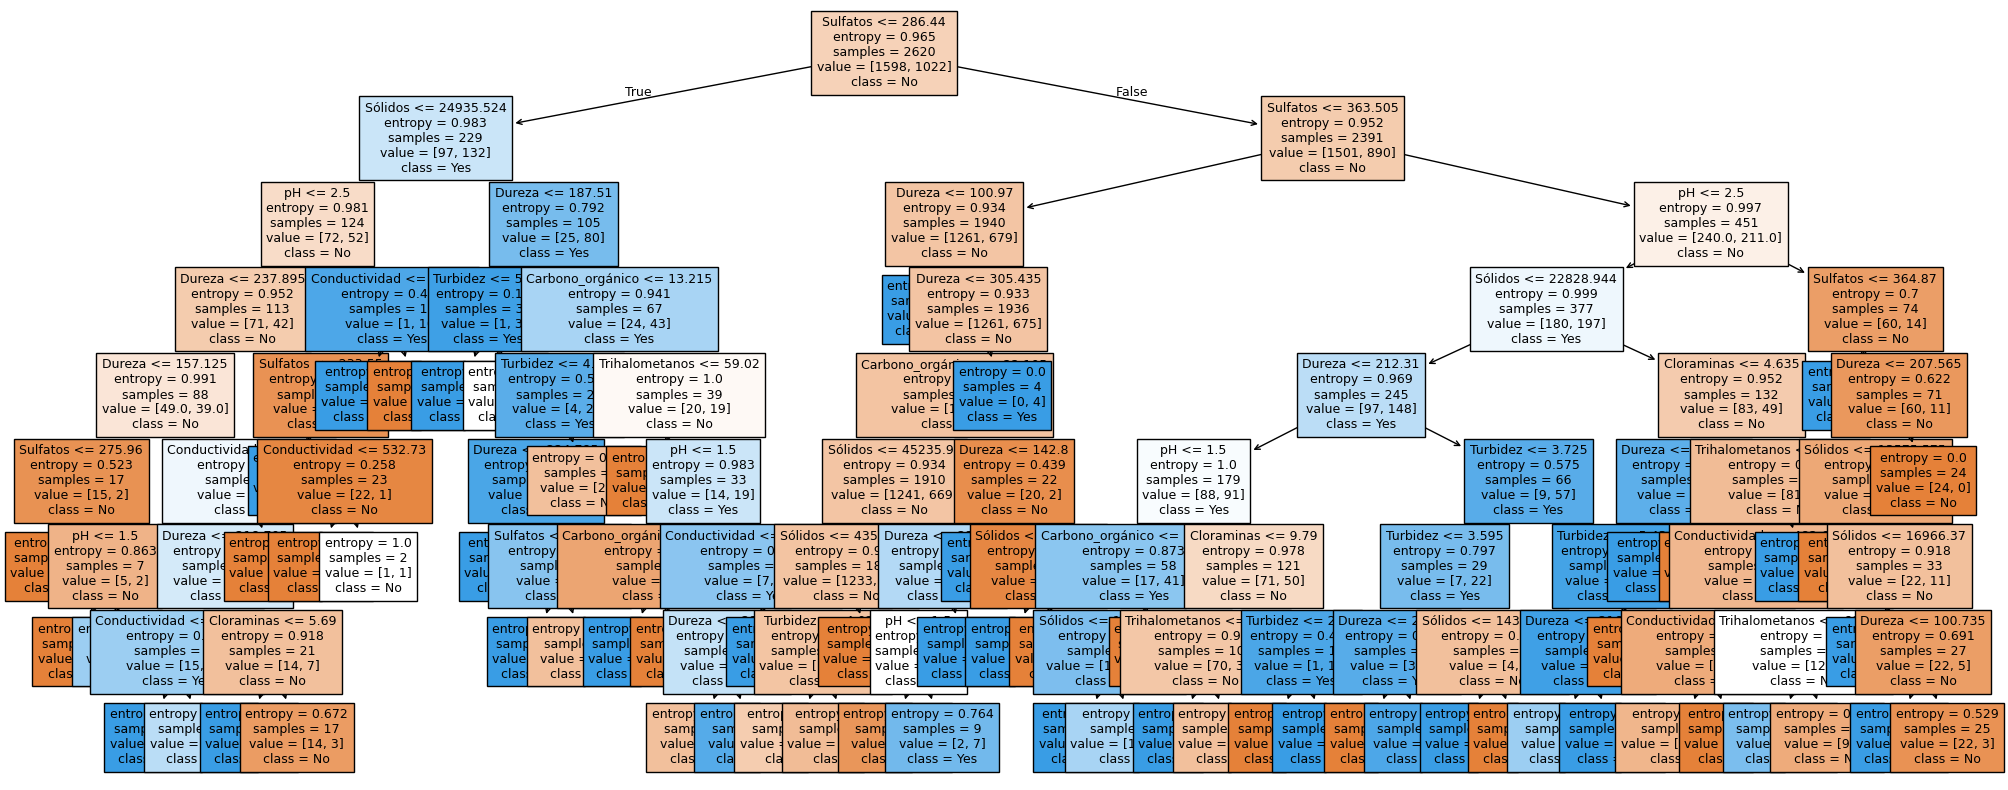

In [58]:
plt.figure(figsize=(25,10))
tree = plot_tree(
    mejor_modelo,
    feature_names=x_train.columns,
    class_names=['No','Yes'],
    filled=True,
    fontsize=9
)

In [59]:
x_test = test.drop(['Potabilidad'],axis=1)
y_test = test['Potabilidad']

In [60]:
x_test_transformed = pipeline.transform(x_test)
x_test_transformed

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez
282,2.0,173.33,20111.82,6.70,332.88,374.49,19.94,66.675,4.56
2735,2.0,211.45,20003.50,7.24,332.88,524.65,13.78,49.900,3.82
2807,2.0,241.07,22656.71,7.29,332.88,315.60,16.40,46.140,3.74
2497,2.0,187.23,49341.42,4.34,300.70,437.33,13.97,66.675,5.29
2630,3.0,276.70,18743.22,9.16,361.22,457.55,21.56,93.740,5.22
...,...,...,...,...,...,...,...,...,...
2639,2.0,229.61,13197.57,6.01,334.05,605.47,14.86,103.320,3.69
661,2.0,218.57,11724.62,7.57,296.43,452.73,14.67,51.260,3.56
2793,1.0,185.68,25927.27,8.20,321.82,490.97,10.67,51.550,4.56
1004,2.0,229.24,21733.83,7.90,315.19,368.77,11.64,49.800,4.63


In [61]:
y_pred = mejor_modelo.predict(x_test_transformed)

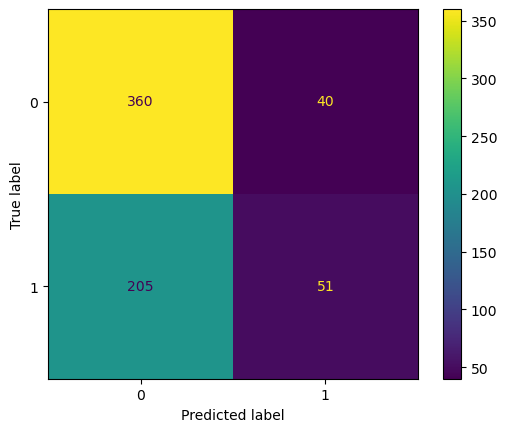

In [62]:
ConfusionMatrixDisplay.from_estimator(mejor_modelo, x_test_transformed, y_test)  
plt.show()

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75       400
           1       0.56      0.20      0.29       256

    accuracy                           0.63       656
   macro avg       0.60      0.55      0.52       656
weighted avg       0.61      0.63      0.57       656



### Para K-vecinos

In [65]:
k_values = list(range(1,6,1))
k_values

[1, 2, 3, 4, 5]

In [66]:
train_scores, val_scores = validation_curve(estimator=KNeighborsClassifier(),
                                            X=x_train_transformed,
                                            y=y_train,
                                            param_name='n_neighbors',
                                            param_range=k_values,
                                            scoring='accuracy',
                                            cv=10)

In [67]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

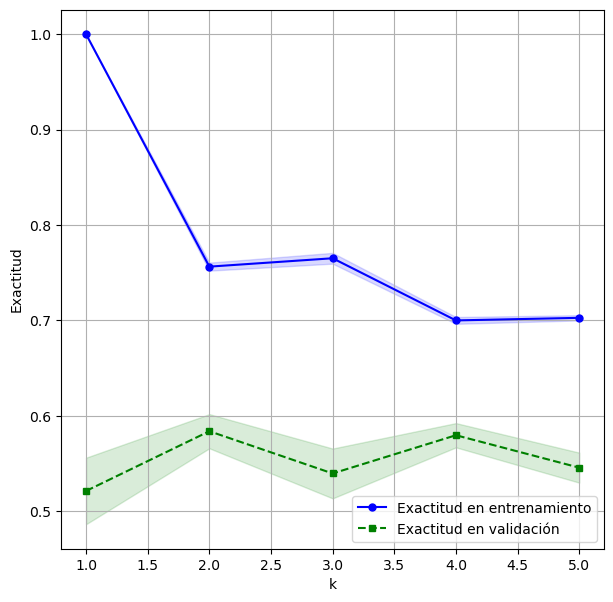

In [68]:
# Inicializamos la figura
plt.figure(figsize=(7,7))

# Creamos la curva de validación para el conjunto de entrenamiento
plt.plot(k_values, train_mean, color='blue', marker='o', markersize=5, label='Exactitud en entrenamiento')
plt.fill_between(k_values, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')

# Creamos la curva de validación para el conjunto de validación
plt.plot(k_values, val_mean, color='green', linestyle='--', marker='s', markersize=5, label='Exactitud en validación')
plt.fill_between(k_values, val_mean+val_std, val_mean-val_std, alpha=0.15, color='green')

# Agregamos una grilla y etiquetas para los ejes
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('k')
plt.ylabel('Exactitud')
plt.show()

In [69]:
mejor_indice = np.argmax(val_mean)
mejor_indice

1

In [70]:
mejor_k = k_values[mejor_indice]
mejor_k

2

In [71]:
mejor_modelo = KNeighborsClassifier(n_neighbors=mejor_k).fit(x_train_transformed,y_train)

In [72]:
y_pred = mejor_modelo.predict(x_test_transformed)

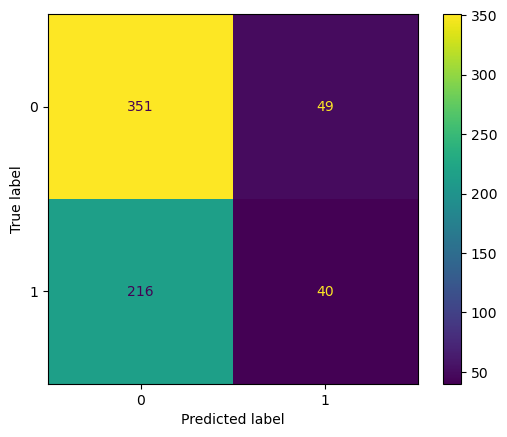

In [73]:
ConfusionMatrixDisplay.from_estimator(mejor_modelo, x_test_transformed,y_test)
plt.show()

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.88      0.73       400
           1       0.45      0.16      0.23       256

    accuracy                           0.60       656
   macro avg       0.53      0.52      0.48       656
weighted avg       0.55      0.60      0.53       656



In [75]:
x_clasif = x_test_transformed.iloc[1]
x_clasif

pH                      2.00
Dureza                211.45
Sólidos             20003.50
Cloraminas              7.24
Sulfatos              332.88
Conductividad         524.65
Carbono_orgánico       13.78
Trihalometanos         49.90
Turbidez                3.82
Name: 2735, dtype: float64

## Modelado

## Evaluacion

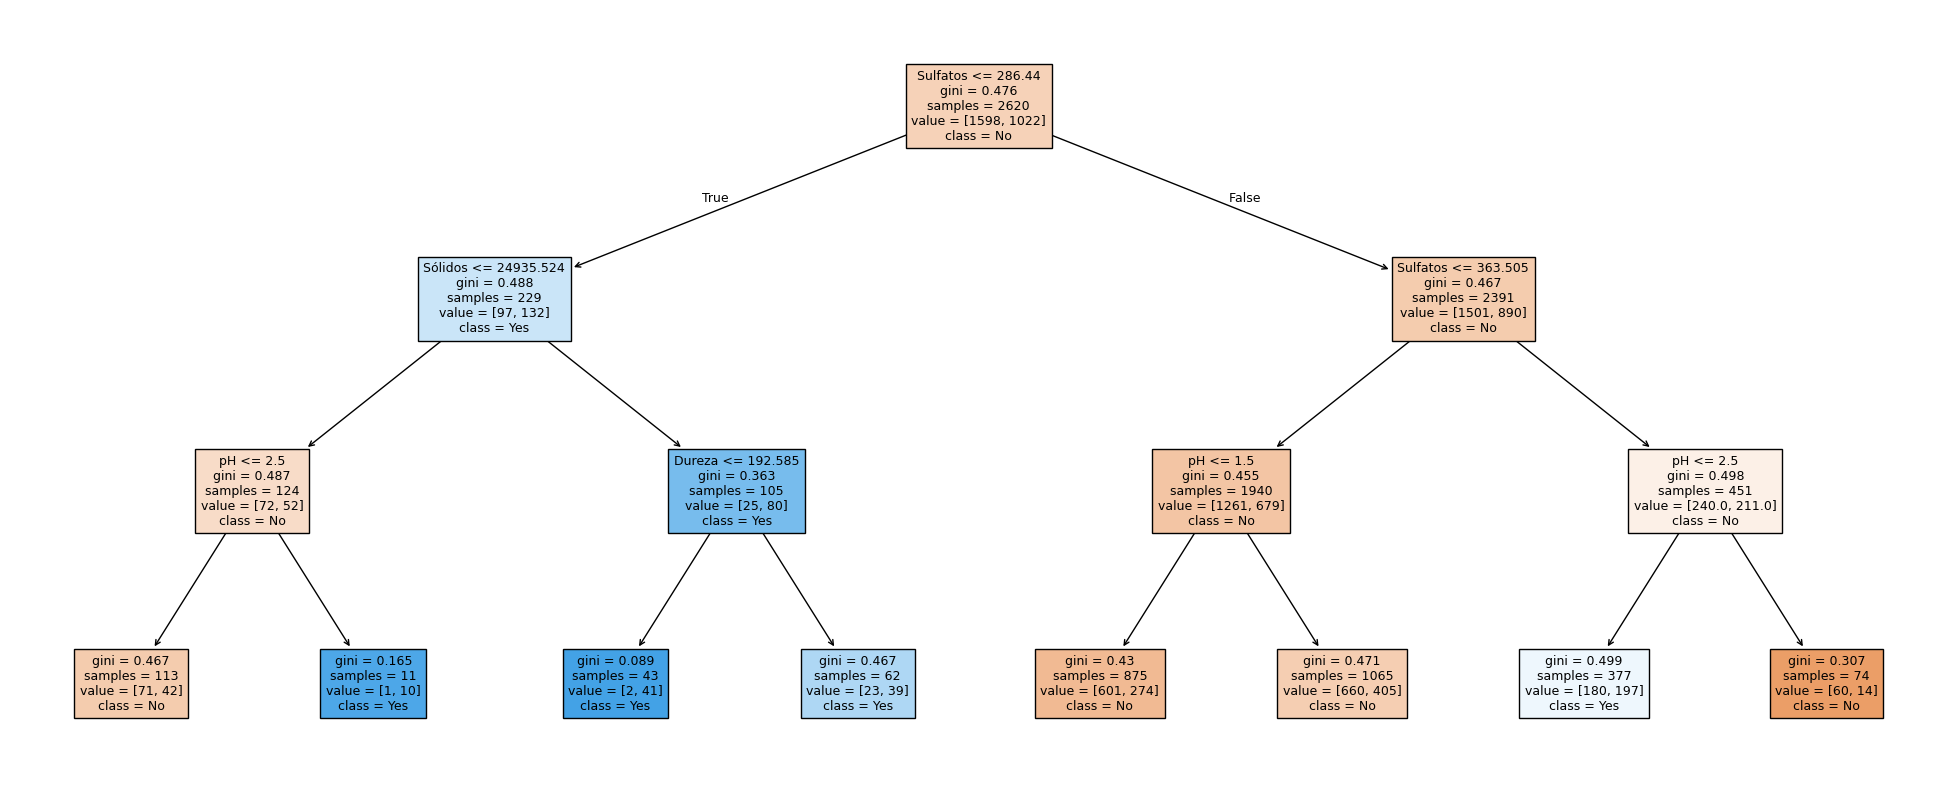

In [78]:
mejor_modelo = DecisionTreeClassifier(max_depth=3, random_state=9) # Se agrega max_depth=3
mejor_modelo.fit(x_train, y_train)

# Visualizar el árbol entrenado
plt.figure(figsize=(25, 10))
tree = plot_tree(
    mejor_modelo,
    feature_names=x_train.columns,
    class_names=['No', 'Yes'],
    filled=True,
    fontsize=9
)
plt.show()